<a href="https://colab.research.google.com/github/Boat5040/CV/blob/main/Exercise_2_LinearRegression_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 2: Build a linear regression model for diabete progression Problem
##### (10 points) --> your total will divided by 5 to get 5 points for this exercise.
---

Can we use the linear regression model to predict the progress diabete progression based on BMI ?

Our aim in his exercis is apply the linear regression algorithm to a real-life problem.
In particular, we seek to:
* Build linear rgression models with Cross-Validation
* Using Hyperparameter Tuning Using Grid Search Cross-Validation


** You will find the dataset (diabetes.csv) under the datasets section on Canvas **

### Step to do:

In [7]:
# import the requierd pakages:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [8]:
# Load the data with Pandas using read_csv()
# Loading the dataset using pandas
data = pd.read_csv('diabetes.csv')

In [9]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1- divide the data into features (X) and target (y) --> your target is bmi  (2 point)

In [10]:
# write your code here:
X = data.drop('bmi', axis=1)

In [11]:
# write your code here:
y = data['bmi']

2- Plot scatter plot to get a better idea of the effect of each feature on the target variable BMI (2 points)

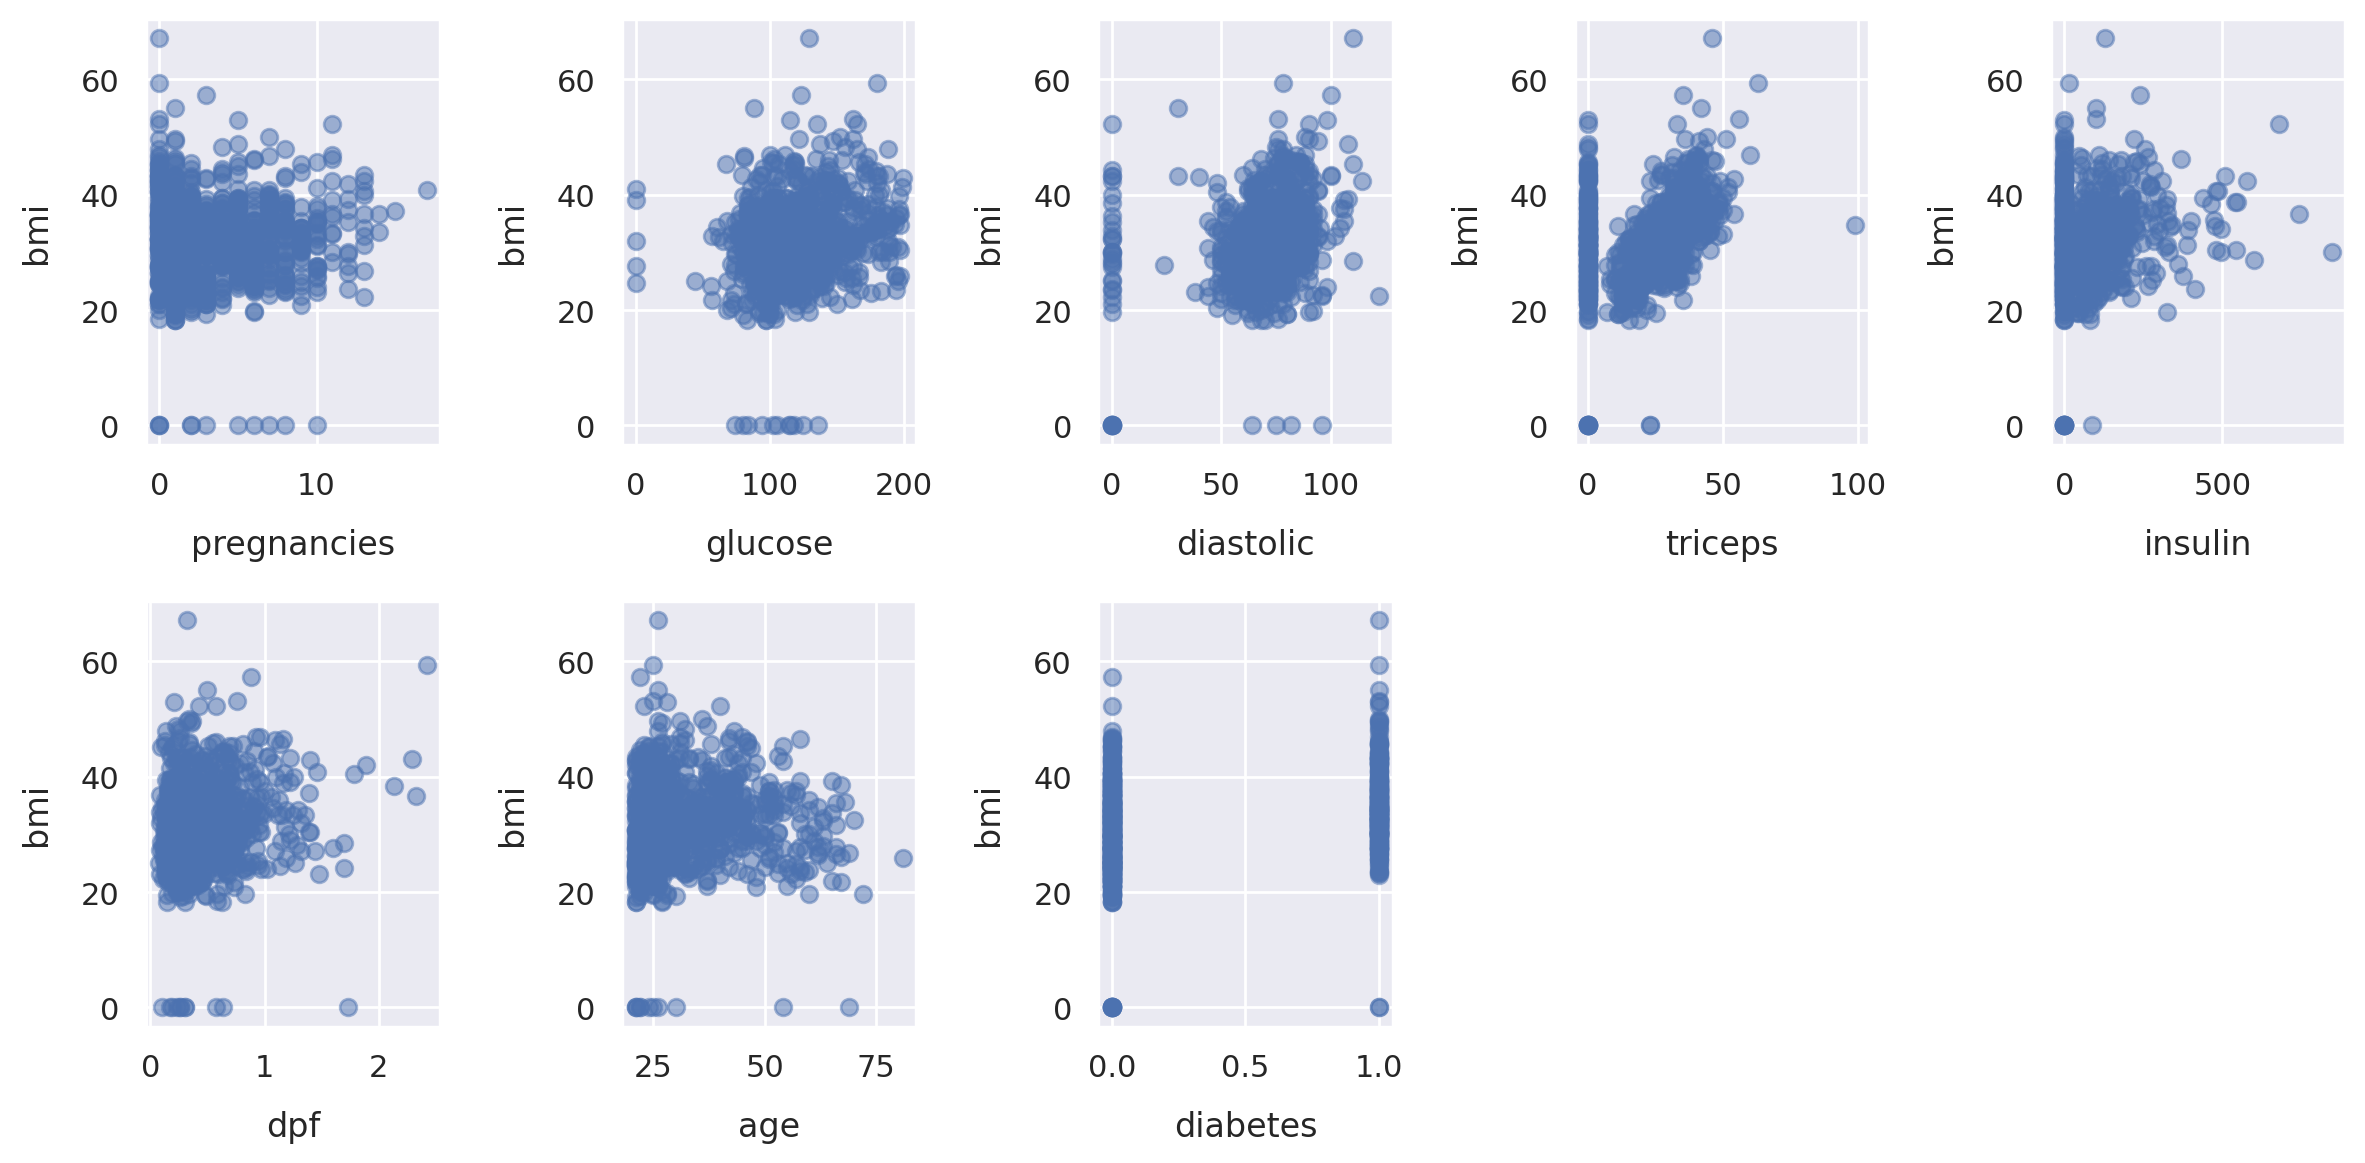

In [12]:
# write your code here:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('bmi')
plt.tight_layout()
plt.show()


3- Plotting the box plot to check for outliers using boxplot (2 points)

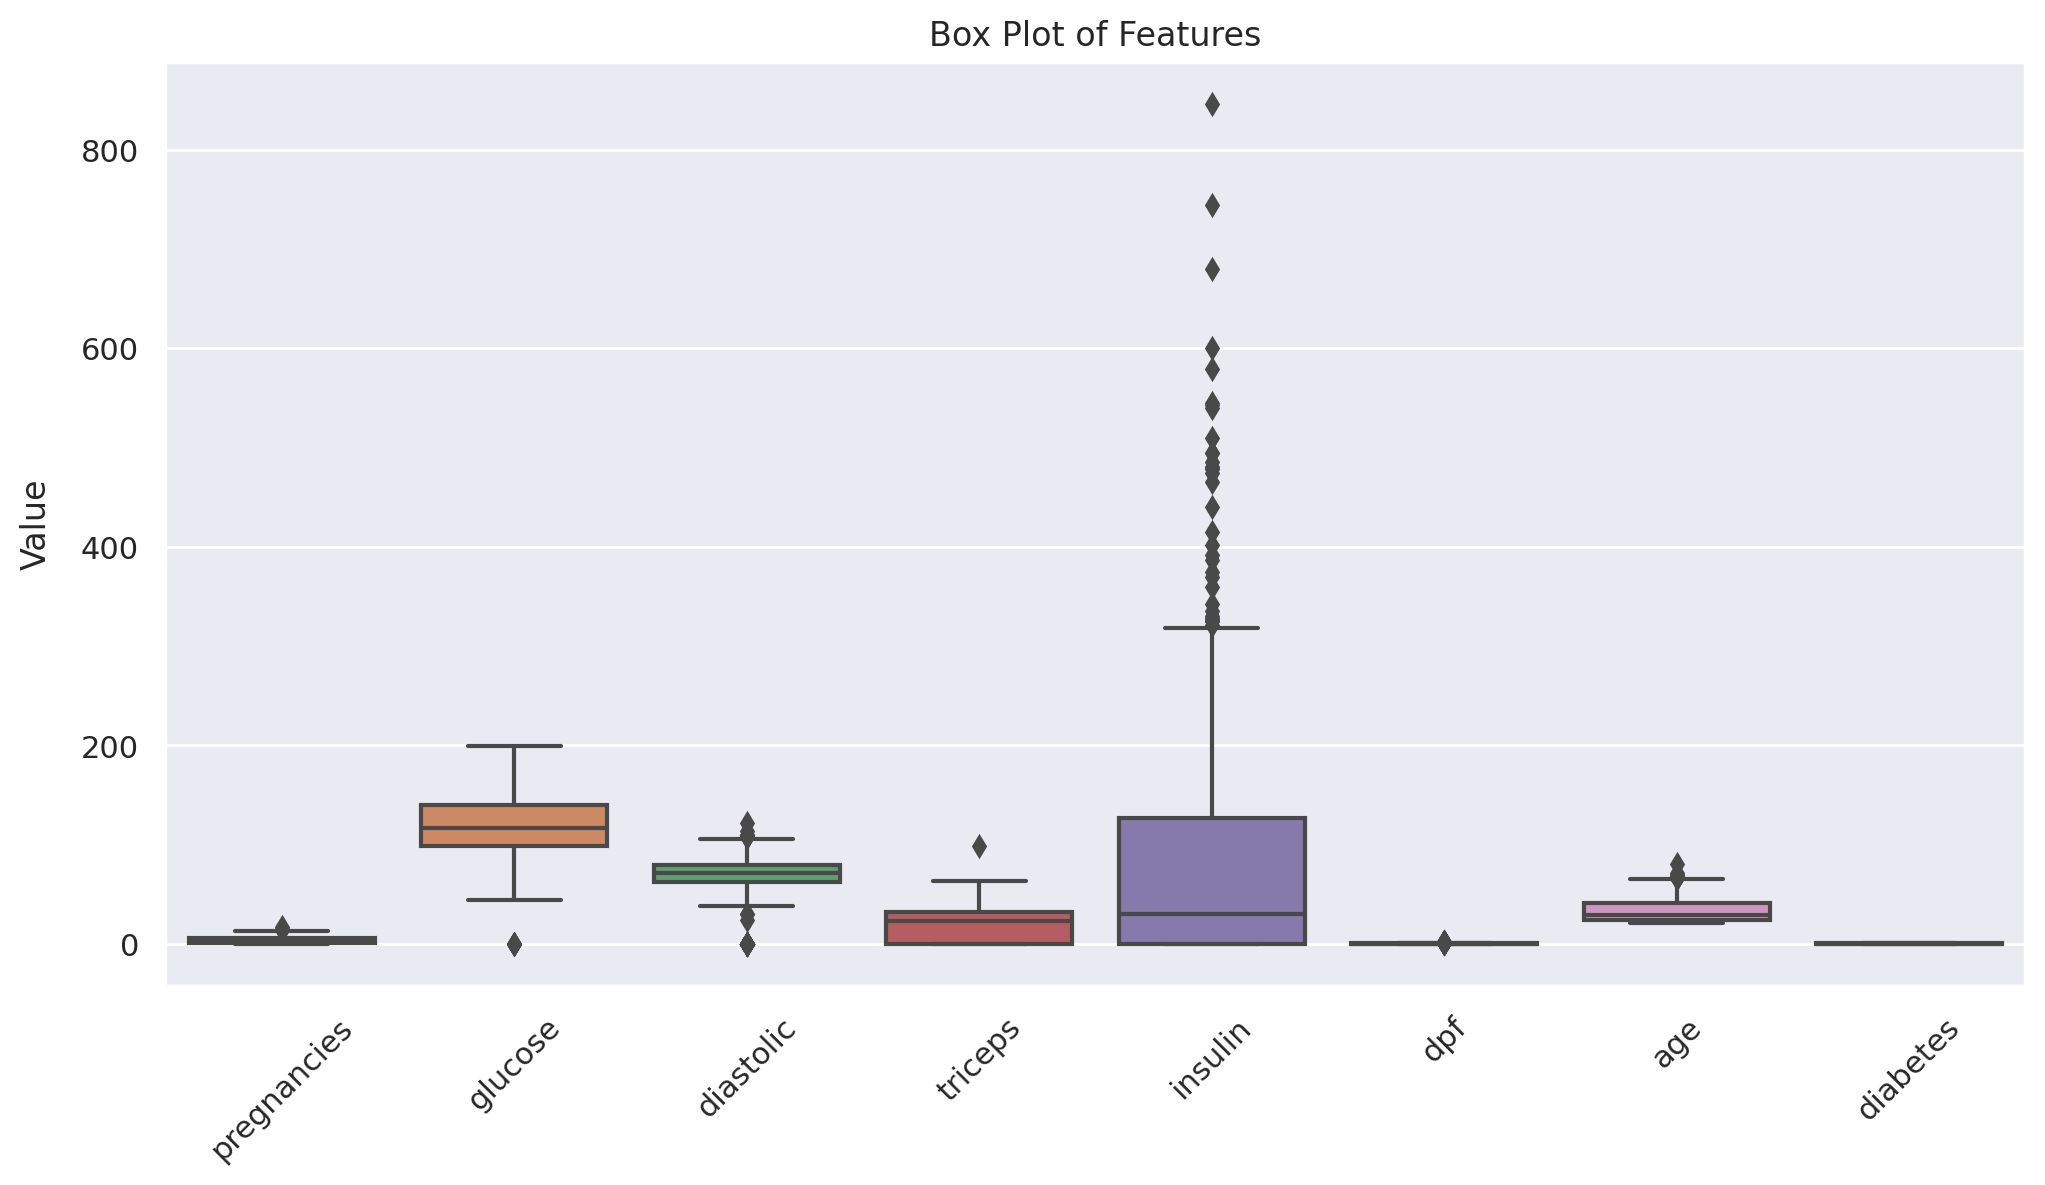

In [13]:
# write your code here:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, orient='v')
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

4- Splitting the data into training and testing sets (2 points)

We train the model with 80% of the samples and test with the remaining 20%.

In [14]:
# write your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset, and evaluate the linear regression modle (2 points)
* Use k=5
* use MSE as your metric

Remember  : 'neg_mean_squared_error' returns the negated value of the MSE, make sure to take the absolute to get the positive one

In [32]:
# write your code here:
# Create a pipeline with two steps: scaling and linear regression

pipeline = make_pipeline(StandardScaler(), LinearRegression())


# Perform k-fold cross-validation with k=5
k = 5
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# The cross_val_score returns the negative MSE, so take the absolute value to get positive MSE
positive_mse_scores = -mse_scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = positive_mse_scores.mean()
std_mse = positive_mse_scores.std()

# Fit the pipeline on the entire training dataset
pipeline.fit(X_train, y_train)

# Predict on the test dataset
y_pred = pipeline.predict(X_test)

# Calculate MSE on the test dataset
test_mse = mean_squared_error(y_test, y_pred)

print(f"Mean Cross-Validated MSE: {mean_mse}")
print(f"Standard Deviation of Cross-Validated MSE: {std_mse}")
print(f"Test MSE: {test_mse}")

Mean Cross-Validated MSE: 45.42141571249804
Standard Deviation of Cross-Validated MSE: 11.79841927941709
Test MSE: 52.46005874215569
